In [2]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import nibabel as nib
import os

data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/'
inf_path = '/proj/NIRAL/users/siyangj/model_10112055/inference_21900_normal/'
new_path = '/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/'

INFO:tensorflow:TensorFlow version 1.9.0
CRITICAL:tensorflow:Optional Python module cv2 not found, please install cv2 and retry if the application fails.
INFO:tensorflow:Available Image Loaders:
['nibabel', 'skimage', 'pillow', 'simpleitk', 'dummy'].


In [4]:
## Normalize each image
im_num = range(1,9)
for n in im_num:
    
    im_T1  = sitk.ReadImage(data_path+'T1/' +str(n)+'.nrrd')
    im_T2  = sitk.ReadImage(data_path+'T2/' +str(n)+'.nrrd')
    im_seg = sitk.ReadImage(data_path+'seg/'+str(n)+'.nrrd')
    im_inf = sitk.ReadImage(os.path.join(inf_path,'{}_niftynet_out.nii.gz'.format(str(n))))
    
    im_len = im_T2.GetSize()
    
    for i in range(im_len[0]):
        for j in range(im_len[1]):
            for k in range(im_len[2]):
                if im_T1[i,j,k]>0 and im_T2[i,j,k]>0 and im_seg[i,j,k]==0:
                    im_seg[i,j,k] = im_inf[i,j,k]
                    im_T1[i,j,k] = 0
                    im_T2[i,j,k] = 0
    sitk.WriteImage(im_seg,os.path.join(new_path,'{}.nrrd'.format(str(n))))

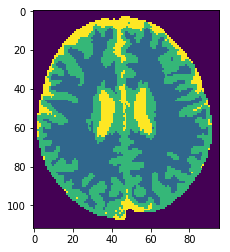

In [6]:
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/8.nrrd'))[60,:,:])

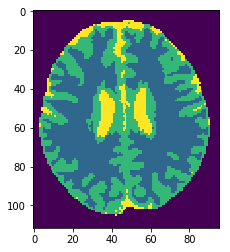

In [7]:
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg/8.nrrd'))[60,:,:])

In [4]:
for i in range(1,9):

    ai = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/{:d}.nrrd'.format(i)))
    a1 = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/T1/{:d}.nrrd'.format(i)))
    a2 = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/T2/{:d}.nrrd'.format(i)))
    ag = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg/{:d}.nrrd'.format(i)))

    print(np.logical_xor(np.logical_and(a1>0,a2>0),ai>0).sum())

4916
276529
2
22
861
257
103
92


In [41]:
(ai>0).sum()

541719

In [42]:
np.logical_xor(np.logical_and(a1>0,a2>0),ai>0).sum()

4916

In [3]:
def Dice(pred,true,labels=[0,1,2,3]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        ret[i] = 2*np.logical_and(p,t).sum()/(p.sum()+t.sum())
    return ret

In [52]:
for i in range(1,9):
    ai = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg_inf_1/{:d}.nrrd'.format(i)))
    ag = sitk.GetArrayFromImage(sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/seg/{:d}.nrrd'.format(i)))
    print(Dice(ai,ag))

[0.9956538  1.         0.99896022 0.98141006]
[0.99649289 0.99993923 0.99737149 0.9832011 ]
[1. 1. 1. 1.]
[0.99826935 1.         0.99730621 0.9926607 ]
[0.94142738 0.99887685 0.96544385 0.80583123]
[0.95626525 0.99910188 0.96331651 0.71248829]
[0.95545518 0.99892323 0.95581414 0.70867574]
[0.96351325 0.99871609 0.95499634 0.77855566]


In [55]:
(ai==1).sum()

136087

In [56]:
(ag==1).sum()

135738

In [6]:
print('{:.7f}'.format(2*np.logical_and(ai==1,ag==1).sum() / ((ag==1).sum()+(ai==1).sum())))

0.9987161


In [60]:
135738/136087

0.9974354640781264